In [8]:

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


## 데이터 읽어오기.
data = pd.read_csv("./BostonHousing.csv")

print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6

In [9]:

x_data = data.copy()
y_data = data.pop('MEDV')

dataset_stats = data.describe()
dataset_stats = dataset_stats.transpose()

## data normalization
def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

def standard_norm(x):
  return (x - dataset_stats['mean']) / dataset_stats['std']

normed_train_data = standard_norm(data)



In [10]:

input_layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
output_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [11]:


loss = tf.keras.losses.mean_squared_error
optimizer = tf.keras.optimizers.SGD(learning_rate=0.007)
metrics = tf.keras.metrics.RootMeanSquaredError()

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

In [12]:
result = model.fit(normed_train_data, y_data, epochs = 1000, batch_size=100)

Epoch 1/1000
6/6 [==============================] - 1s 3ms/step - loss: 190.8359 - root_mean_squared_error: 13.8143
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 84.8937 - root_mean_squared_error: 9.2138
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 104.8233 - root_mean_squared_error: 10.2383
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 83.6507 - root_mean_squared_error: 9.1461
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step - loss: 84.9600 - root_mean_squared_error: 9.2174
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 87.0524 - root_mean_squared_error: 9.3302
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 94.5458 - root_mean_squared_error: 9.7235
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 89.7697 - root_mean_squared_error: 9.4747
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 82.5365 - ro

In [13]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


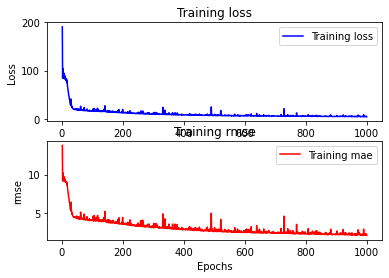

In [14]:
loss = result.history['loss']

# loss 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

# mae그래프
plt.subplot(212)
plt.plot(epochs, mae, 'r-', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [15]:
print("\ Test rmse : %.4f" % (model.evaluate(normed_train_data, y_data)[1]))

16/16 [==============================] - 0s 1ms/step - loss: 4.5073 - root_mean_squared_error: 2.1230
\ Test rmse : 2.1230
